<h1><font color = "Red"> Assignment - 1</font></h1>

## 1. Necessary Libraries are imported

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## 2. Reading the data as a data frame

In [2]:
df = pd.read_csv("insurance.csv")

## 3. Basic Exploratory Data Analysis

### a. Shape of the data

In [3]:
df.shape

(1338, 7)

### b. Data type of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### c. Checking the presence of missing values

In [5]:
print(df.isnull().values.any())

False


### d. 5 Point Summary of numerical attributes

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Univariate Analysis

<font color = "blue">Distribution of column - 'bmi'</font>

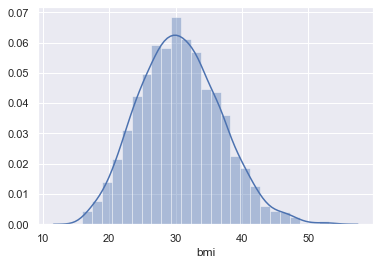

In [7]:
sns.set(color_codes=True)

#Uni-variate distribution using seaborn

sns.distplot(df['bmi']) 

<font color = "blue">Distribution of column - 'age'</font>

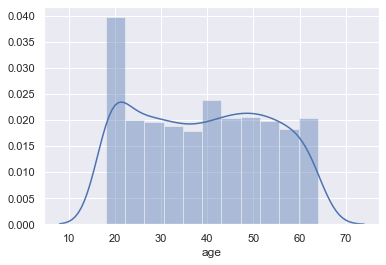

In [8]:
sns.distplot(df['age'])

<font color = "blue">Distribution of column - 'charges'</font>

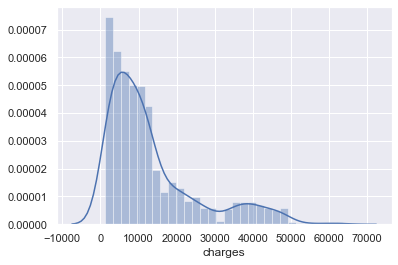

In [9]:
sns.distplot(df['charges'])

### f. Measure of skewness

In [10]:
#bmi

df['bmi'].skew()

0.2840471105987448

<font color = 'blue'>Skew value is 0.2, we can say that this distribution will be almost symmetric</font>

In [11]:
#age

df['age'].skew()

0.05567251565299186

<font color = 'blue'>Skew value is 0.05, we can say that this distribution will be almost symmetric </font>

In [12]:
#charges

df['charges'].skew()

1.5158796580240388

<font color = 'blue'>Skew value is 1.5, we can say that this distribution will be highly skewed (Positive / Right Skew)</font>

### g. Checking the presence of outliers

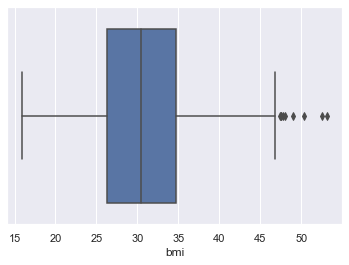

In [13]:
#Checking the presence of outliers in column 'bmi'

sns.boxplot(x='bmi',data=df)

<font color = "blue">There are some points placed between (approximate values) 47 to 55, which is not inside the box nor near the quartiles, that says the presence of outliers in the column 'bmi'</font>

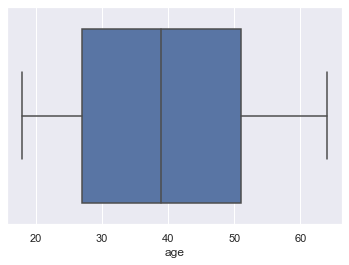

In [14]:
#Checking the presence of outliers in column 'age'

sns.boxplot(x='age',data=df)

<font color = 'blue'> There are no visible points lying outside the box nor near the quartiles, that says outliers is not present in the column 'age'

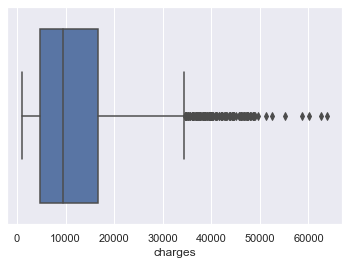

In [15]:
#Checking the presence of outliers in column 'charges'

sns.boxplot(x='charges',data=df)

<font color = 'blue'>There are plenty of points placed between (approximate values) 35K to 65K, which is not inside the box nor near the quartiles, that says the presence of outliers in the column 'charges'</font>

### h. Categorical Column Distribution

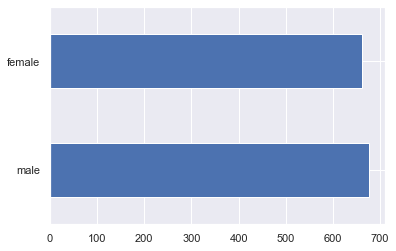

In [16]:
#value-counts() helps us in analyzing the categorical variables

sex = df['sex'].value_counts()

#Kind of plot - Bar Horizontal

sex.plot(kind='barh') 

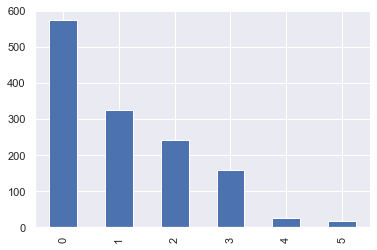

In [17]:
children = df['children'].value_counts()

#Kind of plot - Bar

children.plot(kind='bar') 

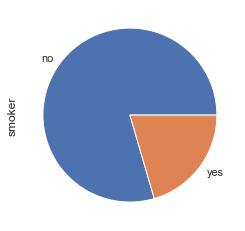

In [18]:
smoker = df['smoker'].value_counts()

#Kind of plot = Pie

smoker.plot(kind='pie') 

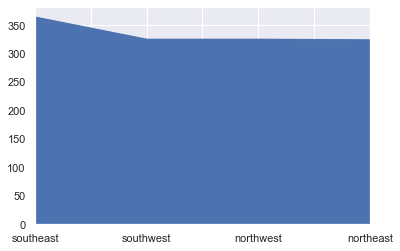

In [19]:
region = df['region'].value_counts()

#Kind of plot = Area

region.plot(kind='area') 

### i. Pair plot

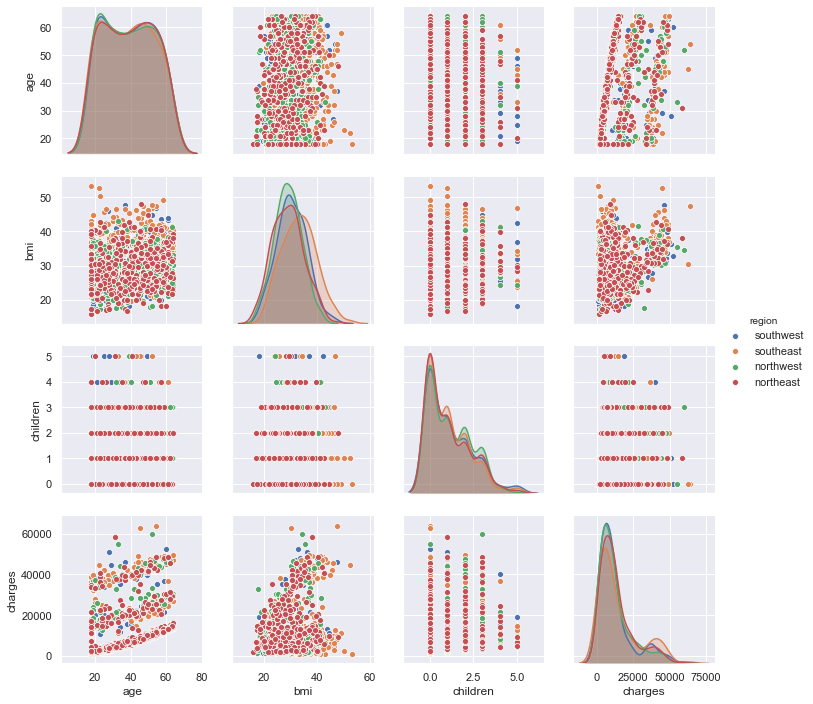

In [20]:
#Pair-plot of the columns in the data frame, with column 'region' as hue value

sns.pairplot(df, hue = 'region')

## 4. Answer the following with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

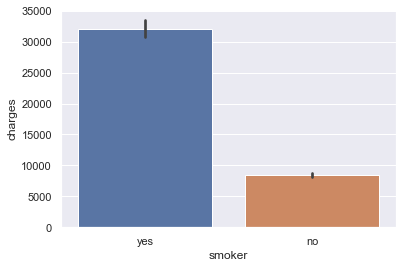

In [21]:
#Barplot gives a spectacular bi-variate visualization over categorical variables

sns.barplot(x = "smoker", y = "charges", data = df)

Observation: <font color = 'blue'> Yes, charges of people who smoke differ significantly from the people who don't, where smokers are charged way higher than the non-smokers </font>

### b. Does bmi of males differ significantly from that of females?

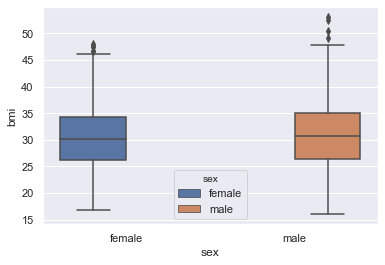

In [22]:
#Tried the bi-variate abalysis with boxplot, which is more informative

sns.boxplot(x = "sex", y ="bmi", data = df, hue = 'sex')

Observation: <font color = 'blue'> No, bmi of males does not differ significantly from that of females</font>

### c. Is the proportion of smokers significantly different in different genders?

In [23]:
#Referred pd.crosstab from https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/

smoker_gender = pd.crosstab(index = df["smoker"], columns = df["sex"])
smoker_gender

sex,female,male
smoker,,
no,547,517
yes,115,159


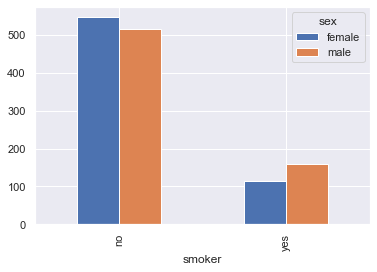

In [24]:
#Nice visualization to get the proportion of smokers from genders

smoker_gender.plot(kind="bar")

Observation: <font color = 'blue'> No, the proportion of smokers doe not significantly differ in different genders, still there is a slight deviation but not significantly</font>

### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [25]:
#In order for smooth operations converting str to int, where assigning 'female' to 0 and 'male' to 1

def convert(x):
    if x == "female":
        return 0
    else:
        return 1
    
df1 = df
gender = df1['sex']
women = gender.map(convert)
df1['sex'] = women

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [26]:
#Extracting the data where 'sex' = 0 , i.e, Female

women_a = df1[df1['sex'] == 0]
women_a.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.92400
5,31,0,25.74,0,no,southeast,3756.62160
6,46,0,33.44,1,no,southeast,8240.58960
7,37,0,27.74,3,no,northwest,7281.50560
9,60,0,25.84,0,no,northwest,28923.13692


In [27]:
#Extracting the data where 'children' = 0, 1 & 2 respectively

women_no_child = women_a[women_a['children'] == 0]
women_one_child = women_a[women_a['children'] == 1]
women_two_child = women_a[women_a['children'] == 2]

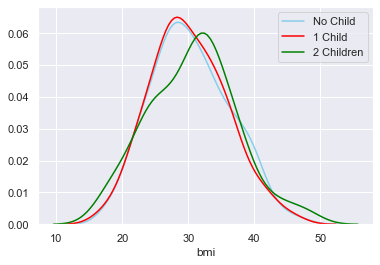

In [28]:
#Generating the distribution between bmi across three different data of women with children count

sns.distplot( women_no_child["bmi"] , color="skyblue", label="No Child", hist = False)
sns.distplot( women_one_child["bmi"] , color="red", label="1 Child", hist = False)
sns.distplot( women_two_child["bmi"] , color="green", label="2 Children", hist = False)

Observation: <font color = 'blue'> We can see that distribution of data with 'No Child' and '1 Child' is almost same but we can see some changes in the data with '2 Children', where the mean is moving away from those of 'No Child' and '1 Child'</font>